In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import ast

In [15]:
rb_df2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/HG01106_rbDF.csv").set_index("Alu")
rb_df2

,Unnamed: 0,RepeatBlock,Lengths,Group,Color,Block_Size
Alu,,,,,,
C_AluY_2855516-2855807,0,0,1608,['50689 196 23.5 4.1 4.0 chrY.21-24.01.AMPL7-P...,#118AB2,1000-1999
C_AluY_2857936-2858227,1,0,2413,['50692 415 24.7 3.9 3.4 chrY.21-24.01.AMPL7-P...,#06D6A0,2000-2999
C_AluY_2860356-2860646,2,0,2412,['50695 413 25.1 3.5 3.5 chrY.21-24.01.AMPL7-P...,#06D6A0,2000-2999
C_AluY_2862775-2863065,3,0,2412,['50698 408 24.7 3.7 3.7 chrY.21-24.01.AMPL7-P...,#06D6A0,2000-2999
C_AluY_2865192-2865483,4,0,2411,['50701 408 25.1 3.4 3.8 chrY.21-24.01.AMPL7-P...,#06D6A0,2000-2999
...,...,...,...,...,...,...
+_AluSx_37859386-37859718,6761,43,555,['80620 2114 13.0 0.7 0.0 chrY.21-24.01.AMPL7-...,black,<999
+_AluJb_37860846-37860996,6762,43,1012,['80622 18 21.8 0.0 0.0 chrY.21-24.01.AMPL7-PA...,black,1000-1999
+_AluSp_37860997-37861294,6763,43,298,['80624 2101 12.8 0.7 0.3 chrY.21-24.01.AMPL7-...,black,<999


In [16]:
import ast
AluCoordinateDict={}
for row in rb_df2.index:
    AluCoordinateDict[str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[5].split("PAR2.FW.unassigned-0000976.")[1])+":"+str(ast.literal_eval(rb_df2.at[row,'Group'])[0].split(" ")[6])+"-"+str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[7])]= row

In [17]:
AluCoordinateDict

{'HG01106:2854767-2856374': 'C_AluY_2855516-2855807',
 'HG01106:2856382-2858794': 'C_AluY_2857936-2858227',
 'HG01106:2858802-2861213': 'C_AluY_2860356-2860646',
 'HG01106:2861221-2863632': 'C_AluY_2862775-2863065',
 'HG01106:2863640-2866050': 'C_AluY_2865192-2865483',
 'HG01106:2866058-2868467': 'C_AluY_2867609-2867900',
 'HG01106:2868475-2870884': 'C_AluY_2870028-2870319',
 'HG01106:2870893-2873304': 'C_AluY_2872446-2872737',
 'HG01106:2873312-2875723': 'C_AluY_2874866-2875157',
 'HG01106:2875732-2878143': 'C_AluY_2877286-2877577',
 'HG01106:2878152-2880557': 'C_AluY_2879699-2879990',
 'HG01106:2880565-2882975': 'C_AluY_2882117-2882408',
 'HG01106:2882983-2885388': 'C_AluY_2884530-2884821',
 'HG01106:2885396-2887808': 'C_AluY_2886950-2887241',
 'HG01106:2887816-2890228': 'C_AluY_2889370-2889661',
 'HG01106:2890236-2892648': 'C_AluY_2891790-2892081',
 'HG01106:2892656-2895065': 'C_AluY_2894207-2894498',
 'HG01106:2895073-2897485': 'C_AluY_2896627-2896918',
 'HG01106:2897493-2899905': 

In [18]:
AluDict = {x:'temp' for x in rb_df2.index}
for alu in AluDict:
    if  rb_df2.loc[alu]['RepeatBlock'] >= 41:
        AluDict[alu]='black'
    else:
        AluDict[alu]= 'green'

AluDict

{'C_AluY_2855516-2855807': 'green',
 'C_AluY_2857936-2858227': 'green',
 'C_AluY_2860356-2860646': 'green',
 'C_AluY_2862775-2863065': 'green',
 'C_AluY_2865192-2865483': 'green',
 'C_AluY_2867609-2867900': 'green',
 'C_AluY_2870028-2870319': 'green',
 'C_AluY_2872446-2872737': 'green',
 'C_AluY_2874866-2875157': 'green',
 'C_AluY_2877286-2877577': 'green',
 'C_AluY_2879699-2879990': 'green',
 'C_AluY_2882117-2882408': 'green',
 'C_AluY_2884530-2884821': 'green',
 'C_AluY_2886950-2887241': 'green',
 'C_AluY_2889370-2889661': 'green',
 'C_AluY_2891790-2892081': 'green',
 'C_AluY_2894207-2894498': 'green',
 'C_AluY_2896627-2896918': 'green',
 'C_AluY_2899047-2899338': 'green',
 'C_AluY_2901460-2901751': 'green',
 'C_AluY_2903875-2904166': 'green',
 'C_AluY_2906294-2906585': 'green',
 'C_AluY_2908712-2909003': 'green',
 'C_AluY_2911130-2911422': 'green',
 'C_AluY_2913549-2913840': 'green',
 'C_AluY_2915969-2916260': 'green',
 'C_AluY_2918388-2918679': 'green',
 'C_AluY_2920808-2921099': '

In [19]:
AluDict2={}
for x,y in AluDict.items():
    if y == 'black':
        continue
    else:
        AluDict2[x]=0.0

In [20]:
AluDict2

{'C_AluY_2855516-2855807': 0.0,
 'C_AluY_2857936-2858227': 0.0,
 'C_AluY_2860356-2860646': 0.0,
 'C_AluY_2862775-2863065': 0.0,
 'C_AluY_2865192-2865483': 0.0,
 'C_AluY_2867609-2867900': 0.0,
 'C_AluY_2870028-2870319': 0.0,
 'C_AluY_2872446-2872737': 0.0,
 'C_AluY_2874866-2875157': 0.0,
 'C_AluY_2877286-2877577': 0.0,
 'C_AluY_2879699-2879990': 0.0,
 'C_AluY_2882117-2882408': 0.0,
 'C_AluY_2884530-2884821': 0.0,
 'C_AluY_2886950-2887241': 0.0,
 'C_AluY_2889370-2889661': 0.0,
 'C_AluY_2891790-2892081': 0.0,
 'C_AluY_2894207-2894498': 0.0,
 'C_AluY_2896627-2896918': 0.0,
 'C_AluY_2899047-2899338': 0.0,
 'C_AluY_2901460-2901751': 0.0,
 'C_AluY_2903875-2904166': 0.0,
 'C_AluY_2906294-2906585': 0.0,
 'C_AluY_2908712-2909003': 0.0,
 'C_AluY_2911130-2911422': 0.0,
 'C_AluY_2913549-2913840': 0.0,
 'C_AluY_2915969-2916260': 0.0,
 'C_AluY_2918388-2918679': 0.0,
 'C_AluY_2920808-2921099': 0.0,
 'C_AluY_2923228-2923519': 0.0,
 'C_AluY_2925645-2925934': 0.0,
 'C_AluY_2928061-2928352': 0.0,
 'C_AluY

In [21]:
ASDFList = []
AllBad =[]
for row in rb_df2.index:
    if int(rb_df2.at[row,'RepeatBlock']) >= 41:
        AllBad.append(row)
        continue
    else:
        simple=0
        sat=0
        alu=0
        for repeat in ast.literal_eval(rb_df2.at[row,'Group']):
            if 'Simple_repeat' in str(repeat):
                simple+=1
            elif 'Satellite' in str(repeat):
                sat+=1
            elif 'SINE/Alu' in str(repeat):
                alu+=1
            else:
                continue

        if simple ==0 or sat ==0:
            ASDFList.append(row)
            AllBad.append(row)
        else:
            continue

In [22]:
notableAluY = []
file1 = open('/home/mark/Desktop/chromosome_y/Divergence_Analysis_DYZ/DYZ_young/HG01106_DYZ_nameTrimmed.fasta.out', 'r')
Lines = file1.readlines()
        
for line in Lines:
    goodString = (' '.join(line.split()))
    
    if 'DYZ2_Consensus' in goodString:
        AluDict2[AluCoordinateDict[str(goodString.split(" ")[4])]]=float(goodString.split(" ")[1])
                
    elif 'AluY_Consensus' in goodString:
        notableAluY.append(str(goodString.split(" ")[4]))
                
    else:
        continue

In [23]:
AluDict2

{'C_AluY_2855516-2855807': 1.5,
 'C_AluY_2857936-2858227': 1.2,
 'C_AluY_2860356-2860646': 0.9,
 'C_AluY_2862775-2863065': 0.9,
 'C_AluY_2865192-2865483': 1.5,
 'C_AluY_2867609-2867900': 1.9,
 'C_AluY_2870028-2870319': 1.6,
 'C_AluY_2872446-2872737': 1.3,
 'C_AluY_2874866-2875157': 1.5,
 'C_AluY_2877286-2877577': 1.4,
 'C_AluY_2879699-2879990': 0.7,
 'C_AluY_2882117-2882408': 1.8,
 'C_AluY_2884530-2884821': 2.1,
 'C_AluY_2886950-2887241': 1.3,
 'C_AluY_2889370-2889661': 1.4,
 'C_AluY_2891790-2892081': 1.3,
 'C_AluY_2894207-2894498': 1.4,
 'C_AluY_2896627-2896918': 1.8,
 'C_AluY_2899047-2899338': 1.5,
 'C_AluY_2901460-2901751': 1.4,
 'C_AluY_2903875-2904166': 1.3,
 'C_AluY_2906294-2906585': 0.8,
 'C_AluY_2908712-2909003': 1.1,
 'C_AluY_2911130-2911422': 1.1,
 'C_AluY_2913549-2913840': 0.9,
 'C_AluY_2915969-2916260': 1.4,
 'C_AluY_2918388-2918679': 1.3,
 'C_AluY_2920808-2921099': 1.1,
 'C_AluY_2923228-2923519': 0.7,
 'C_AluY_2925645-2925934': 1.1,
 'C_AluY_2928061-2928352': 1.5,
 'C_AluY

In [24]:
AluDict3 = {x:y for x,y in AluDict2.items() if x not in AllBad}
print(len(AluDict2))
print(len(AluDict3))

6735
6677


/home/mark/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

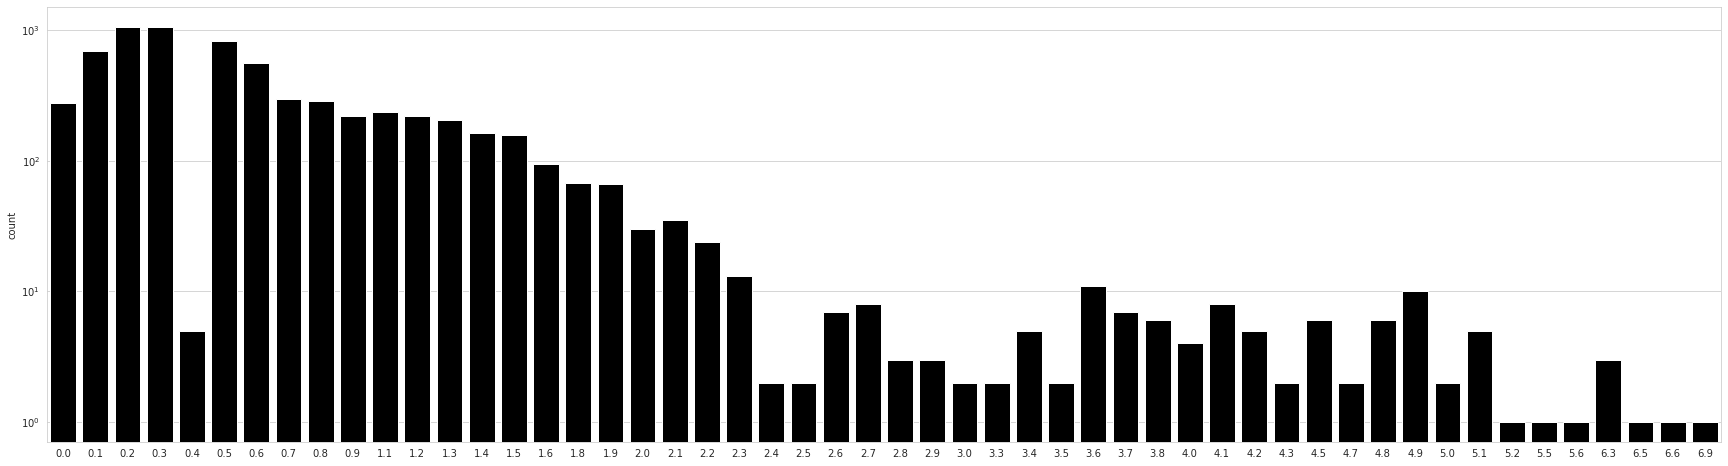

In [25]:
from matplotlib import rcParams
sns.set_style("whitegrid")
rcParams['figure.figsize'] = 30,8
sns.countplot(sorted(list(AluDict3.values())), log=True, color='black')

In [26]:
rb_df2['Divergence']=0.0
for x in rb_df2.index:
    if x in AluDict3.keys():
        rb_df2.at[x,'Divergence']=AluDict3[x]
    else:
        rb_df2.at[x,'Divergence']=100.0
rb_df2

,Unnamed: 0,RepeatBlock,Lengths,Group,Color,Block_Size,Divergence
Alu,,,,,,,
C_AluY_2855516-2855807,0,0,1608,['50689 196 23.5 4.1 4.0 chrY.21-24.01.AMPL7-P...,#118AB2,1000-1999,1.5
C_AluY_2857936-2858227,1,0,2413,['50692 415 24.7 3.9 3.4 chrY.21-24.01.AMPL7-P...,#06D6A0,2000-2999,1.2
C_AluY_2860356-2860646,2,0,2412,['50695 413 25.1 3.5 3.5 chrY.21-24.01.AMPL7-P...,#06D6A0,2000-2999,0.9
C_AluY_2862775-2863065,3,0,2412,['50698 408 24.7 3.7 3.7 chrY.21-24.01.AMPL7-P...,#06D6A0,2000-2999,0.9
C_AluY_2865192-2865483,4,0,2411,['50701 408 25.1 3.4 3.8 chrY.21-24.01.AMPL7-P...,#06D6A0,2000-2999,1.5
...,...,...,...,...,...,...,...
+_AluSx_37859386-37859718,6761,43,555,['80620 2114 13.0 0.7 0.0 chrY.21-24.01.AMPL7-...,black,<999,100.0
+_AluJb_37860846-37860996,6762,43,1012,['80622 18 21.8 0.0 0.0 chrY.21-24.01.AMPL7-PA...,black,1000-1999,100.0
+_AluSp_37860997-37861294,6763,43,298,['80624 2101 12.8 0.7 0.3 chrY.21-24.01.AMPL7-...,black,<999,100.0


In [27]:
#rb_df2.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/rb_df_Divergence.csv")

In [12]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,8
plt.title("HG01106 DYZ Divergence Distribution")
sns.scatterplot(x=rb_df2[rb_df2['Divergence']!=100.0]['Lengths'], y=rb_df2[rb_df2['Divergence']<100.0]['Divergence'], color='black')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01106/HG01106_final_Divergence_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01106/HG01106_final_Divergence_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'Divergence'

In [18]:
palette = {x:'temp' for x in set(rb_df2['Block_Size'])}
palette['1000-1999'] = 'Blue'
palette['2000-2999'] = 'Green'
palette['3000-3999'] = 'Red'
palette['<999'] = 'cyan'

In [21]:
labels

['1000-1999', '2000-2999', '3000-3999', '<999']

[<matplotlib.collections.PathCollection object at 0x7f190c2385b0>, <matplotlib.collections.PathCollection object at 0x7f190a8dbc10>, <matplotlib.collections.PathCollection object at 0x7f190a8723a0>, <matplotlib.collections.PathCollection object at 0x7f190a872190>]
['1000-1999', '2000-2999', '3000-3999', '<999']


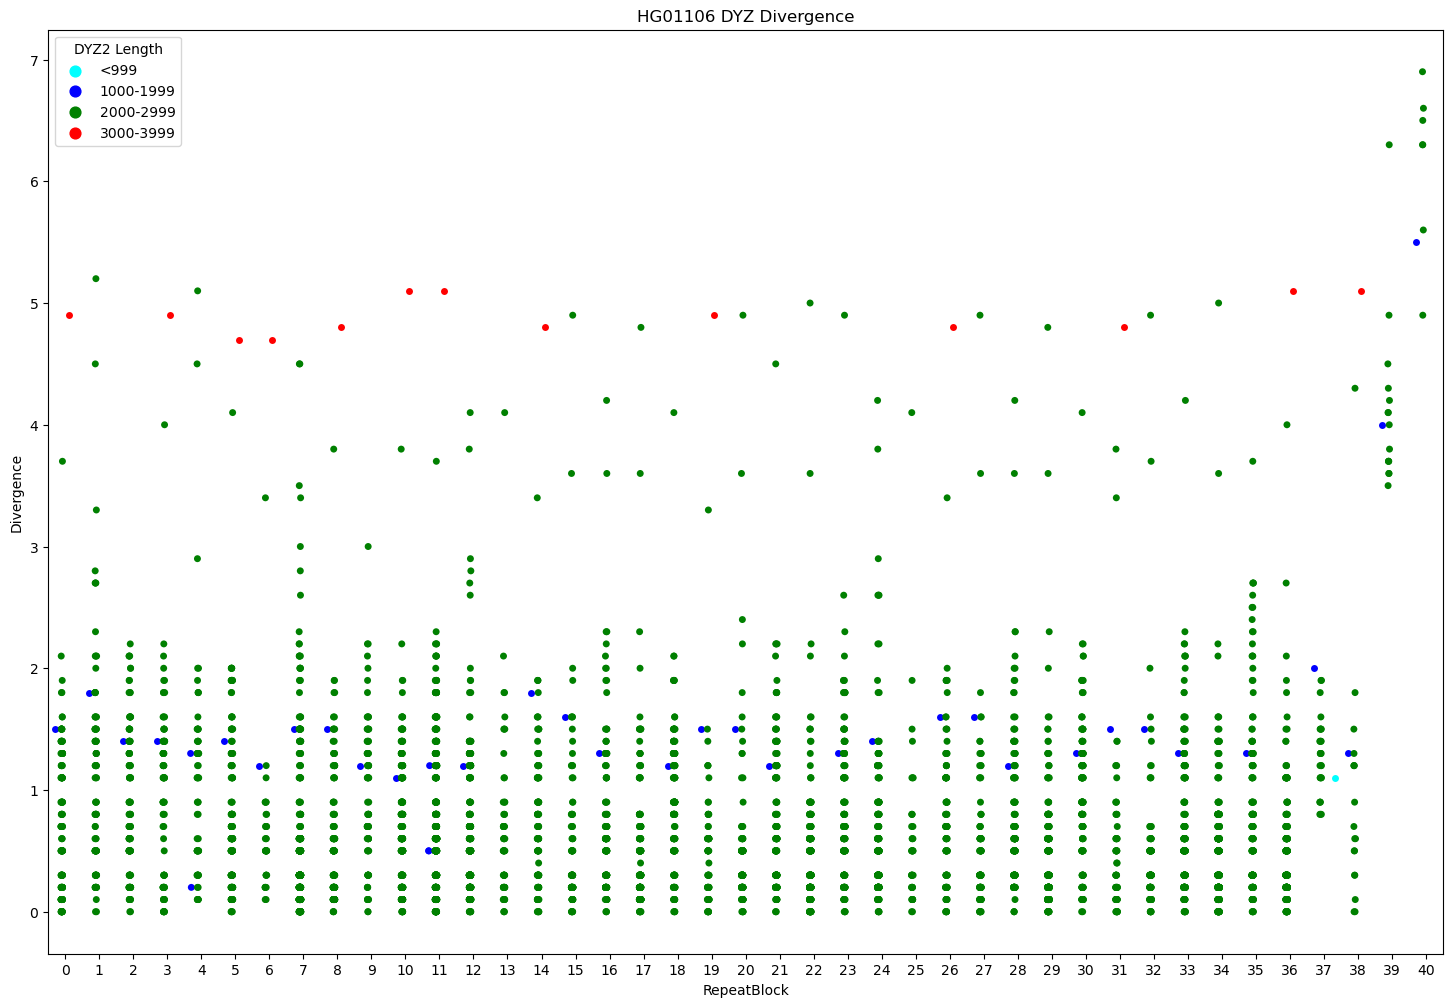

In [22]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HG01106 DYZ Divergence")
ax=sns.stripplot(x="RepeatBlock", y="Divergence", data=rb_df2[rb_df2['Divergence']!=100.0], dodge=True, hue='Block_Size' , palette=palette)
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)
order = [3,0,1,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='DYZ2 Length')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01106/HG01106_final_AluSubblock_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01106/HG01106_final_AluSubblock_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [23]:
for key in AluDict2.keys():
    
    if float(rb_df2.at[key,'Divergence']) == 0.0:
        AluDict[key]='lightgrey'
                
    elif float(rb_df2.at[key,'Divergence']) > 0.0 and float(rb_df2.at[key,'Divergence']) <= 1.0:
        AluDict[key]='#538083' # Steel Teal
    
    elif float(rb_df2.at[key,'Divergence']) > 1.0 and float(rb_df2.at[key,'Divergence']) <= 2.0 :
        AluDict[key]='#2A7F62' #Spanish Viridian

    elif float(rb_df2.at[key,'Divergence']) > 2.0 and float(rb_df2.at[key,'Divergence']) <= 4.0 :
        AluDict[key]='#861657' #Pansy Purple
        
    elif float(rb_df2.at[key,'Divergence']) > 4.0 and float(rb_df2.at[key,'Divergence']) <=6.0 :
        AluDict[key]='#E1CE7A' #Flax
        
    elif float(rb_df2.at[key,'Divergence']) > 6.0 and float(rb_df2.at[key,'Divergence']) <=8.0 :
        AluDict[key]='#F06543' #orange soda

    elif float(rb_df2.at[key,'Divergence']) > 8.0 and float(rb_df2.at[key,'Divergence']) <100.0:
        AluDict[key]='#FF1053' #Radical Red

    else:
        print(key)
        AluDict[key]='black'

C_AluY_6389074-6389404
C_AluY_12301611-12301902
C_AluY_12303035-12303326
C_AluY_12307872-12308163
C_AluY_12309294-12309585
C_AluY_12314131-12314422
C_AluY_12315553-12315844
C_AluY_13184322-13184645
C_AluY_13445796-13446119
C_AluY_13663366-13663657
C_AluY_13664790-13665081
+_AluY_15622092-15622358
C_AluY_15622466-15622756
+_AluY_18479198-18479464
C_AluY_18479570-18479860
+_AluY_22771953-22772219
C_AluY_22772324-22772614
+_AluY_25496920-25497186
C_AluY_25497293-25497583
+_AluY_28491956-28492222
C_AluY_28492328-28492618
+_AluY_33190028-33190294
C_AluY_33190400-33190690
+_AluY_35403025-35403291
C_AluY_35403398-35403688
+_AluY_36797729-36798007
+_AluY_37775684-37775984
C_AluSc8_37776271-37776561
+_AluY_37779443-37779738
+_AluSx_37781009-37781322
+_AluSx_37786418-37786727
+_AluSx_37792246-37792653
+_AluSx_37833393-37833702
+_AluJb_37834175-37834201
+_AluJb_37835750-37836016
C_AluJb_37836633-37836847
+_AluSx_37836906-37837186
+_AluJb_37837615-37837906
C_AluJb_37837970-37838262
+_AluSp_3783862

In [24]:
import collections
collections.Counter(AluDict.values())

Counter({'#2A7F62': 1237,
         '#538083': 4973,
         '#861657': 136,
         'lightgrey': 276,
         '#E1CE7A': 49,
         'black': 89,
         '#F06543': 6})

## Drawing Blocks

In [36]:
import turtle

In [38]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = sorted(set(rb_df2['RepeatBlock']))
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG01106 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df2['RepeatBlock']))[24:]):
    
    totalAlus = len(rb_df2[rb_df2['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(50)
    currentPosition = turtle.position()

    currentPosition = turtle.position()
    
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    for item in list(rb_df2[rb_df2['RepeatBlock']==key].index):
        
        if 'C_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|█| 20/20 [05:05<00:00, 


In [39]:
from PIL import Image

In [40]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [41]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG01106/HG01106_RM_DYZ_Divergence_part2")

In [42]:
turtle.bye()